## **DIABETES DATA ANALYSIS**

# **Background**

Project by : M. Visa Ramadhan

I use Dataset Diabetes from BRFSS in Kaggle. Why i choice this dataset?

First, Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

I Found This dataset from Kaggle https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

File Dataset diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

And The Creator Dataset make this dataset for use by other people has some exploration and research for Diabetes.
Explore some of the following research questions:

1. Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?

2. What risk factors are most predictive of diabetes risk?
Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?

3. Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

So, i just doing the exploration data, Normalitation data, Data Correlation, and some other method.

# **STEP 1. IMPORT Library**

In [1]:
import pandas as pd 
import numpy as np #array computation


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier #algorithm for Classification
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

# **2. Read Data**

In [2]:
Dataset = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
Dataset.keys()


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

**The selected features from the BRFSS 2015 dataset are:**

**Response Variable / Dependent Variable:**

(Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) 
Independent Variables:

**High Blood Pressure**

Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5

**High Cholesterol**

Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? 
Cholesterol check within past five years

**BMI**

Body Mass Index (BMI) 
Smoking

**Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100**

Other Chronic Health Conditions

**(Ever told) you had a stroke. --> CVDSTRK3**

Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) 

**Physical Activity**

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

**Diet**

Consume Fruit 1 or more times per day 
Consume Vegetables 1 or more times per day

**Alcohol Consumption**

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

**Health Care**

Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian 

**Health Service?**

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 

**Health General and Mental Health**

Would you say that in general your health is:

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? 
Do you have serious difficulty walking or climbing stairs?

**Demographics**

Indicate sex of respondent. 
Fourteen-level age category 
What is the highest grade or year of school you completed? 
Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") 



In [3]:
Dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116979,2.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,7.0,6.0,8.0
116980,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
116981,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
116982,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0


In [4]:
datafile = pd.DataFrame(Dataset)
datafile.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
x = np.array(Dataset)
print (x)

[[ 0.  1.  1. ...  9.  4.  3.]
 [ 0.  0.  0. ...  7.  6.  1.]
 [ 0.  1.  1. ...  9.  4.  8.]
 ...
 [ 0.  0.  0. ...  4.  6.  8.]
 [ 0.  0.  0. ...  6.  6.  8.]
 [ 0.  0.  0. ... nan nan nan]]


In [6]:
print (datafile.shape) #for Knowing Total of People Data Survey on Data Set

(116984, 22)


For This, we know about Total Data is 116.984 People (Feature) with 22 Diabates Indicators (Labels)

In [7]:
print (datafile.head(10))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.

In [8]:
print(datafile.describe)

<bound method NDFrame.describe of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
116979           2.0     1.0       0.0        1.0  26.0     1.0     0.0   
116980           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
116981           0.0     0.0       0.0        1.0  30.0     0.0     0.0   
116982           0.0     0.0       0.0        1.0  22.0     0.0     0.0   
116983           0.0     0.0       0.0        1.0  28.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealt

 **Data Distribution**

 For Knowing Distribution Data on any Label in Dataset

In [16]:
print(datafile.groupby('Diabetes_012').size())
print(datafile.groupby('HighBP').size())
print(datafile.groupby('HighChol').size())
print(datafile.groupby('CholCheck').size())
print(datafile.groupby('BMI').size())
print(datafile.groupby('Smoker').size())
print(datafile.groupby('Stroke').size())
print(datafile.groupby('HeartDiseaseorAttack').size())
print(datafile.groupby('PhysActivity').size())
print(datafile.groupby('Fruits').size())
print(datafile.groupby('DiffWalk').size())
print(datafile.groupby('Sex').size())
print(datafile.groupby('Age').size())
print(datafile.groupby('MentHlth').size())
print(datafile.groupby('GenHlth').size())
print(datafile.groupby('MentHlth').size())
print(datafile.groupby('Income').size())

Diabetes_012
0.0    98824
1.0     2166
2.0    15994
dtype: int64
HighBP
0.0    67023
1.0    49961
dtype: int64
HighChol
0.0    66957
1.0    50027
dtype: int64
CholCheck
0.0      4252
1.0    112732
dtype: int64
BMI
12.0      2
13.0      5
14.0     25
15.0     61
16.0    177
       ... 
91.0      1
92.0     31
95.0     10
96.0      1
98.0      7
Length: 81, dtype: int64
Smoker
0.0    64693
1.0    52291
dtype: int64
Stroke
0.0    112247
1.0      4737
dtype: int64
HeartDiseaseorAttack
0.0    106167
1.0     10817
dtype: int64
PhysActivity
0.0    27603
1.0    89381
dtype: int64
Fruits
0.0    41913
1.0    75071
dtype: int64
DiffWalk
0.0    97896
1.0    19087
dtype: int64
Sex
0.0    65502
1.0    51481
dtype: int64
Age
1.0      2620
2.0      3379
3.0      5013
4.0      6217
5.0      7414
6.0      9095
7.0     12216
8.0     14181
9.0     15343
10.0    15029
11.0    11105
12.0     7340
13.0     8031
dtype: int64
MentHlth
0.0     80460
1.0      4143
2.0      6173
3.0      3571
4.0      1791
5.0   

In [17]:
datafile.describe().T.style.set_properties(**{'background-color': 'white','color': 'black','border-color': 'black'})

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,116984.000000,0.291954,0.692936,0.000000,0.000000,0.000000,0.000000,2.000000
HighBP,116984.000000,0.427075,0.494656,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,116984.000000,0.427640,0.494738,0.000000,0.000000,0.000000,1.000000,1.000000
CholCheck,116984.000000,0.963653,0.187152,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,116984.000000,28.404175,7.037579,12.000000,24.000000,27.000000,31.000000,98.000000
Smoker,116984.000000,0.446993,0.497184,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,116984.000000,0.040493,0.197113,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,116984.000000,0.092466,0.289683,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,116984.000000,0.764045,0.424596,0.000000,1.000000,1.000000,1.000000,1.000000
Fruits,116984.000000,0.641720,0.479497,0.000000,0.000000,1.000000,1.000000,1.000000


CLEANING DATA

In [18]:
datafile.info

<bound method DataFrame.info of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
116979           2.0     1.0       0.0        1.0  26.0     1.0     0.0   
116980           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
116981           0.0     0.0       0.0        1.0  30.0     0.0     0.0   
116982           0.0     0.0       0.0        1.0  22.0     0.0     0.0   
116983           0.0     0.0       0.0        1.0  28.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthc

In [19]:
datafile.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     81
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

# **Exploratory Analysis**

a. Visualization Of Categorical Features

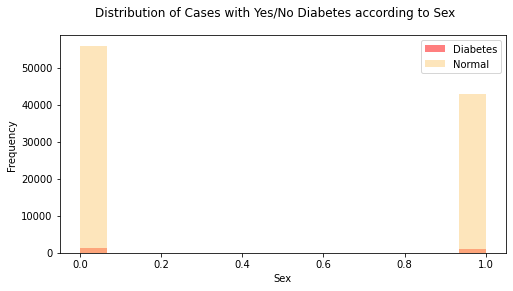

In [24]:
fig, ax = plt.subplots(figsize = (8,4))

ax.hist(datafile[datafile["Diabetes_012"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="Diabetes")
ax.hist(datafile[datafile["Diabetes_012"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Diabetes according to Sex")

ax.legend();

**that number 1 = men and 0 = women on the x-axis.**

**Most cases of Diabetes are Women .**

**Most cases that got no Diabates are Men**

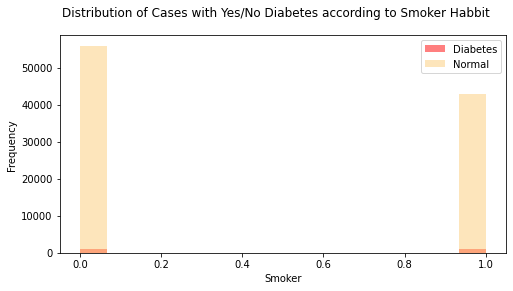

In [25]:
fig, ax = plt.subplots(figsize = (8,4))

ax.hist(datafile[datafile["Diabetes_012"]==1]["Smoker"], bins=15, alpha=0.5, color="red", label="Diabetes")
ax.hist(datafile[datafile["Diabetes_012"]==0]["Smoker"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoker")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Diabetes according to Smoker Habbit")

ax.legend();

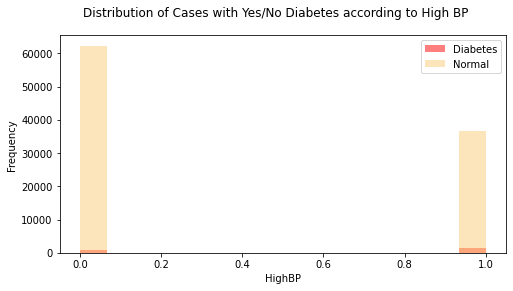

In [26]:
fig, ax = plt.subplots(figsize = (8,4))

ax.hist(datafile[datafile["Diabetes_012"]==1]["HighBP"], bins=15, alpha=0.5, color="red", label="Diabetes")
ax.hist(datafile[datafile["Diabetes_012"]==0]["HighBP"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("HighBP")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Diabetes according to High BP")

ax.legend();

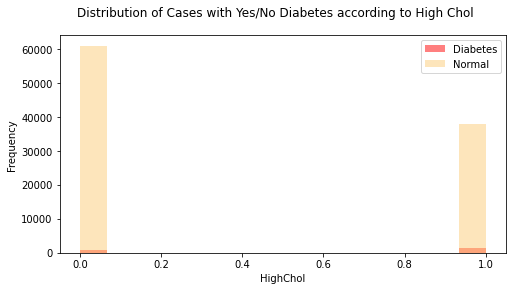

In [27]:
fig, ax = plt.subplots(figsize = (8,4))

ax.hist(datafile[datafile["Diabetes_012"]==1]["HighChol"], bins=15, alpha=0.5, color="red", label="Diabetes")
ax.hist(datafile[datafile["Diabetes_012"]==0]["HighChol"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("HighChol")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Diabetes according to High Chol")

ax.legend();

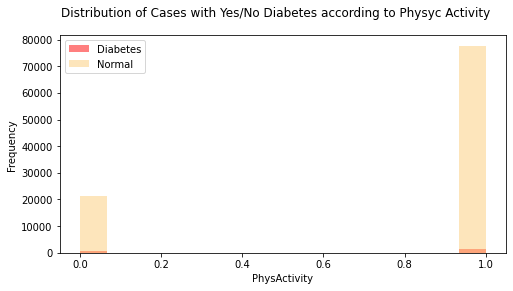

In [30]:
fig, ax = plt.subplots(figsize = (8,4))

ax.hist(datafile[datafile["Diabetes_012"]==1]["PhysActivity"], bins=15, alpha=0.5, color="red", label="Diabetes")
ax.hist(datafile[datafile["Diabetes_012"]==0]["PhysActivity"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("PhysActivity")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Diabetes according to Physyc Activity")

ax.legend();

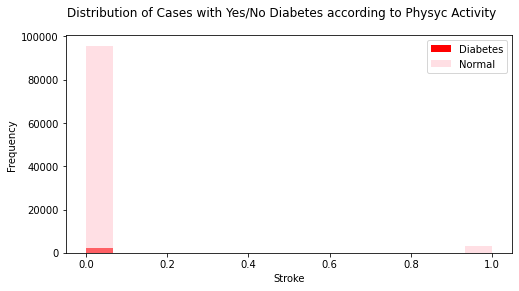

In [31]:
fig, ax = plt.subplots(figsize = (8,4))

ax.hist(datafile[datafile["Diabetes_012"]==1]["Stroke"], bins=15, alpha=1, color="red", label="Diabetes")
ax.hist(datafile[datafile["Diabetes_012"]==0]["Stroke"], bins=15, alpha=0.5, color="pink", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Diabetes according to Physyc Activity")

ax.legend();

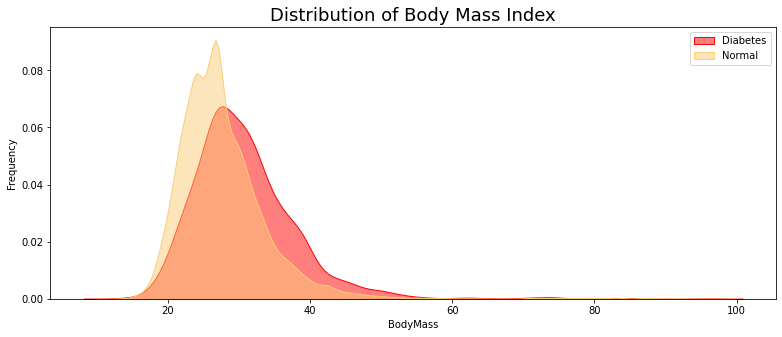

In [33]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(datafile[datafile["Diabetes_012"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="Diabetes", ax = ax)
sns.kdeplot(datafile[datafile["Diabetes_012"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

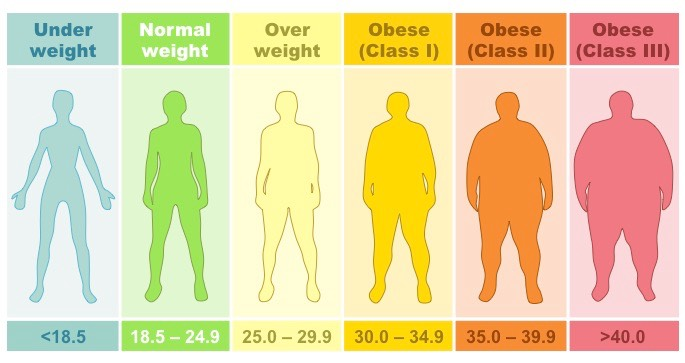

From this graph, we know that people with a normal BMI level already have a diabetes risk, but it is not comparable to the OverWeight level.

**However, what is surprising is that people with high obesity rates have a lower chance of obesity than people with normal BMI levels**

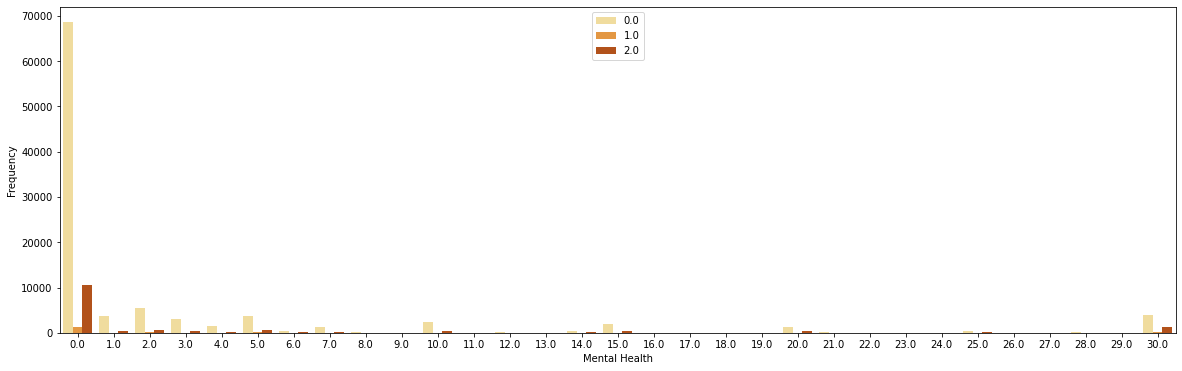

In [35]:
plt.figure(figsize = (20,6))
sns.countplot( x= datafile['MentHlth'], hue = 'Diabetes_012', data = datafile, palette = 'YlOrBr')
plt.xlabel('Mental Health')
plt.legend()
plt.ylabel('Frequency')
plt.show()

0 = no diabetes 

1 = prediabetes 

2 = diabetes

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how

We can see that people with Stress are more susceptible to Diabetes.

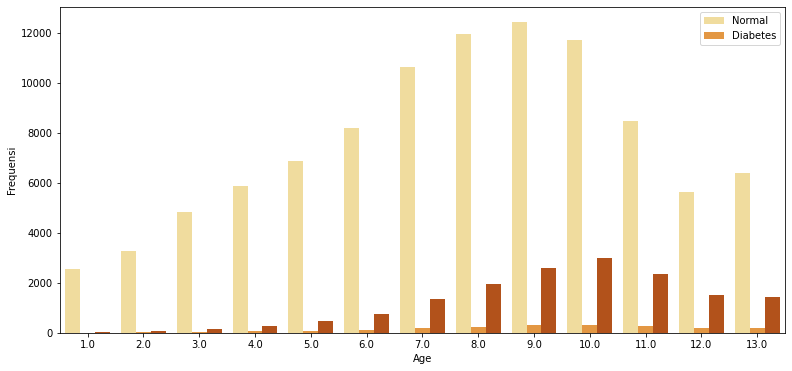

In [32]:
plt.figure(figsize = (13,6))
sns.countplot(x = datafile['Age'], hue = 'Diabetes_012', data = datafile, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('Age')
plt.legend(['Normal','Diabetes'])
plt.ylabel('Frequensi')
plt.show()

We can see people in the 9 Level of age category  having a higher risk of Diabetes

Level Age Category

1 = 18-24

2 = 25-29

3 = 30-34

4 = 35-39

5 = 40-44

6 = 45-49

7 = 50-54

8 = 55-59

9 = 60-64

10 = 65-69

11 = 70-74

12 = 75-79

13 = >80

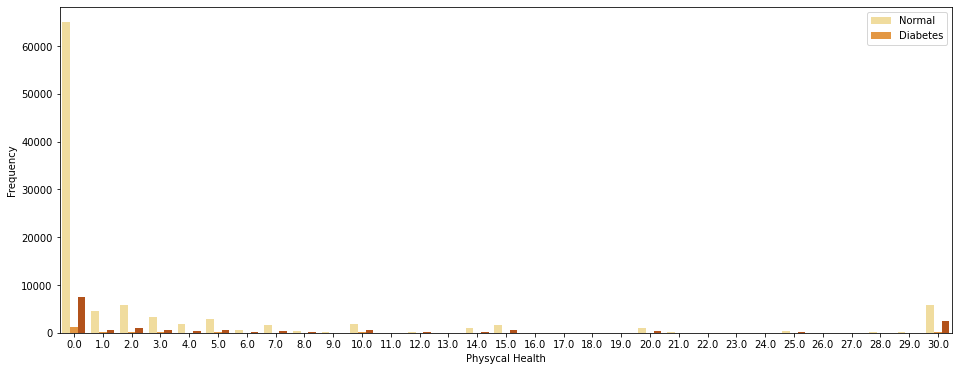

In [37]:
plt.figure(figsize = (16,6))
sns.countplot(x = datafile['PhysHlth'], hue = 'Diabetes_012', data = datafile, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to Physycal Health")
plt.xlabel('Physycal Health')
plt.legend(['Normal','Diabetes'])
plt.ylabel('Frequency')
plt.show()

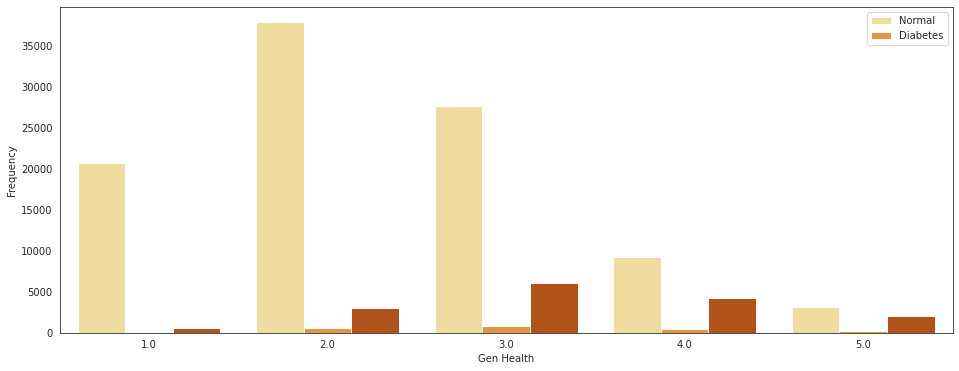

In [51]:
plt.figure(figsize = (16,6))
sns.countplot(x = datafile['GenHlth'], hue = 'Diabetes_012', data = datafile, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to Gen Health")
plt.xlabel('Gen Health')
plt.legend(['Normal','Diabetes'])
plt.ylabel('Frequency')
plt.show()

# **Of several factors, health factors, genes or heredity have a more significant influence. That is, a higher risk of diabetes is obtained from genetic or hereditary factors**

**b. CORRELATION DATA**

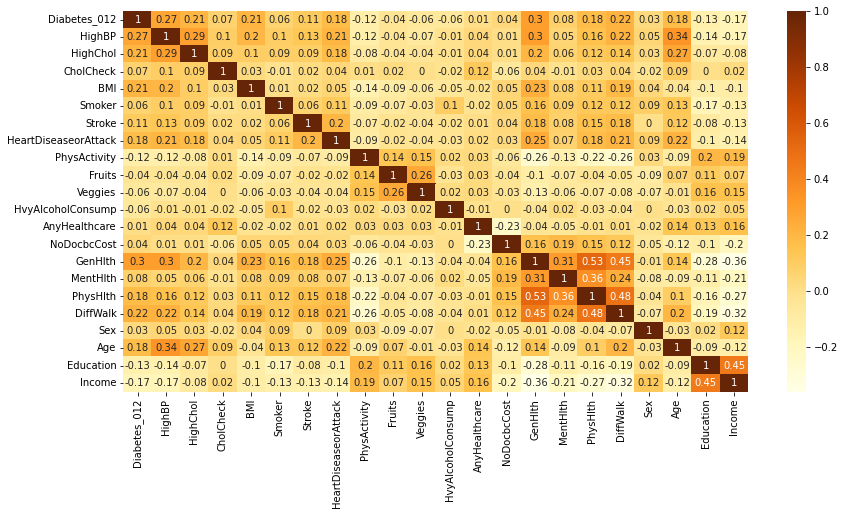

In [38]:
correlation = datafile.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

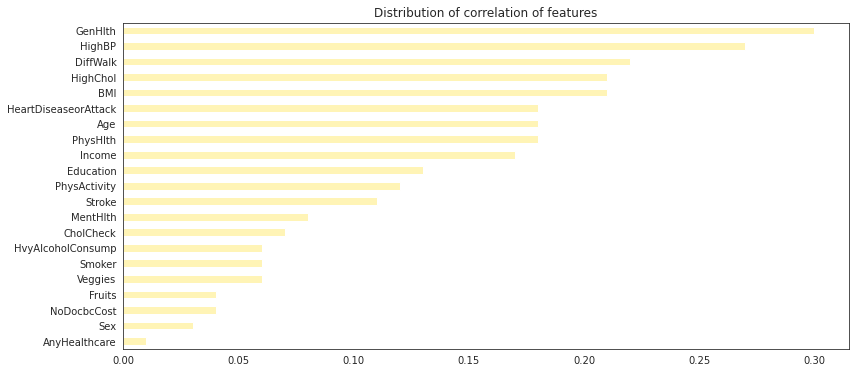

In [39]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['Diabetes_012']).sort_values()[:-1].plot.barh()
plt.show()

# **Split Dataset for Training and Testing**

In [40]:
#Select Features
features = datafile.drop(columns =['Diabetes_012'], axis = 1)

#Select Target 
target = datafile['Diabetes_012']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (93587, 21)
Shape of testing feature: (23397, 21)
Shape of training label: (93587,)
Shape of training label: (23397,)


#**DATA PREPROCESSING**

**a. Encoding**

In [41]:
#ENCODING
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Age', 'PhysHlth', 'MentHlth']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['Age', 'PhysHlth', 'MentHlth'], axis = 1, inplace = True)

# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)


# Remove old columns
X_test.drop(['Age', 'PhysHlth', 'MentHlth'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**b. Standardization**

#**Modelling**

In [43]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

**a. Building model**

In [46]:
X_train

array([[-0.15106264, -0.17169938, -0.21235026, ..., -0.88656211,
        -0.09172343,  0.42507691],
       [-0.15106264, -0.17169938, -0.21235026, ..., -0.88656211,
        -0.09172343,  0.91381404],
       [-0.15106264, -0.17169938, -0.21235026, ...,  1.12795256,
         0.93274592,  0.91381404],
       ...,
       [-0.15106264, -0.17169938, -0.21235026, ...,  1.12795256,
         0.93274592,  0.42507691],
       [-0.15106264, -0.17169938, -0.21235026, ..., -0.88656211,
        -1.11619277, -1.04113448],
       [-0.15106264, -0.17169938, -0.21235026, ...,  1.12795256,
         0.93274592,  0.91381404]])

In [56]:
df =  datafile[datafile.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetes_012'] = df['Diabetes_012'].astype(float)

In [57]:
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

ValueError: ignored

In [49]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

ValueError: ignored

NameError: ignored

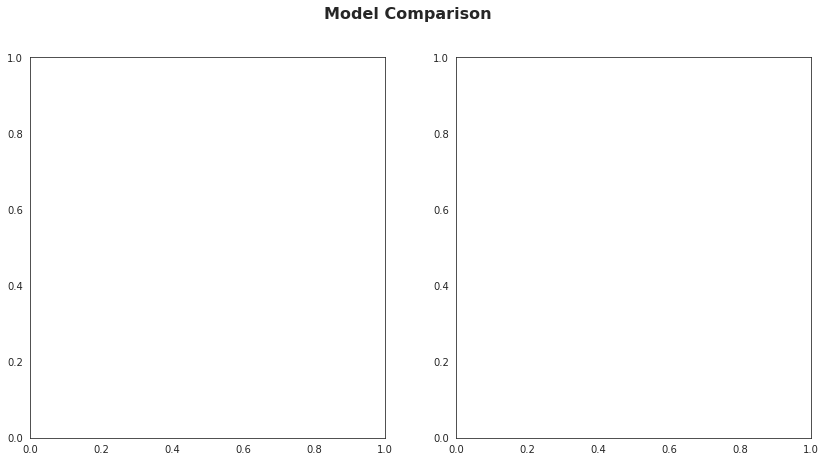

In [52]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()